# Basit Dogrusal Regression

In [1]:
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import seaborn as sns

In [3]:
import pandas as pd
path = 'Advertising.csv'
ad = pd.read_csv(path)
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#df = df.iloc[:,1:len(df)]       1. kolon drop edilir
# pd.read_csv(path, )

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
df.corr().sort_values(by='sales', ascending=False)

,TV,radio,newspaper,sales
sales,0.782224,0.576223,0.228299,1.000000
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299


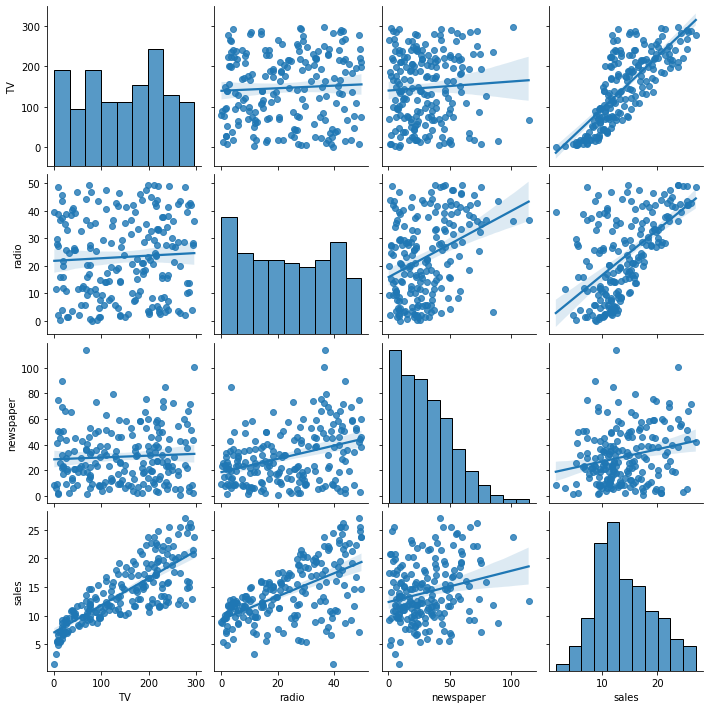

In [10]:
sns.pairplot(df, kind='reg')

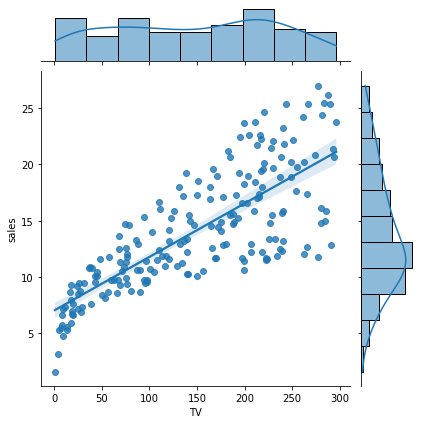

In [11]:
sns.jointplot(x='TV', y='sales', data=df, kind ='reg')

In [12]:
import statsmodels.api as sm

X = df[['TV']]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [13]:
X = sm.add_constant(X)
X[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [14]:
y = df['sales']
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

## Model Summary

In [15]:
lm = sm.OLS(y, X)

model = lm.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        13:25:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
import statsmodels.formula.api as smf
lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Nov 2021   Prob (F-statistic):           1.47e-42
Time:                        13:25:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [18]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [19]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [20]:
model.f_pvalue

1.4673897001947095e-42

In [21]:
print('f_pvalue: ', '%.5f' % model.f_pvalue)

f_pvalue:  0.00000


In [22]:
print('fvalue: ', '%.3f' % model.fvalue)

fvalue:  312.145


In [23]:
print('tvalue: ', '%.3f' % model.tvalues[0:1])

tvalue:  15.360


In [24]:
model.mse_model

3314.6181668686486

In [25]:
model.rsquared

0.611875050850071

In [26]:
model.rsquared_adj

0.6099148238341623

In [27]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [28]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [29]:
print(f'Sales = {round(model.params[0], 2)} + TV * {round(model.params[1], 2)}')

Sales = 7.03 + TV * 0.05


<AxesSubplot:xlabel='TV', ylabel='sales'>

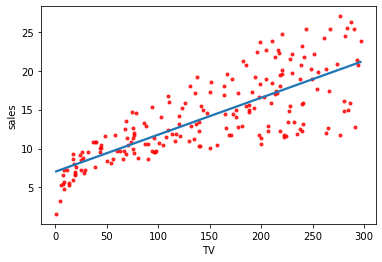

In [30]:
sns.regplot(df['TV'], df['sales'], ci=None, scatter_kws={'color': 'r', 's':9} )

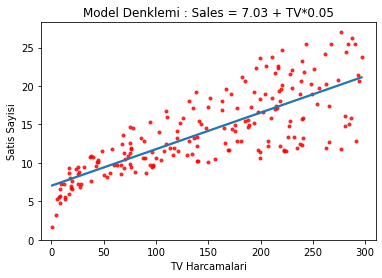

In [31]:
import matplotlib.pyplot as plt 

g = sns.regplot(df['TV'], df['sales'], ci=None, scatter_kws={'color': 'r', 's':9})
g.set_title('Model Denklemi : Sales = 7.03 + TV*0.05')
g.set_ylabel('Satis Sayisi')
g.set_xlabel('TV Harcamalari')
plt.xlim(-10,310)
plt.ylim(bottom=0);

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X = df[['TV']]
y = df[['sales']]
reg = LinearRegression()
model = reg.fit(X, y)

In [34]:
model.intercept_

array([7.03259355])

In [35]:
model.coef_

array([[0.04753664]])

In [36]:
model.score(X, y)

0.611875050850071

In [37]:
model.predict(X)[:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

# Tahmin

Model Denklemi :

Sales = 7.03 + TV*0.04

Ornek : 30 birim TV harcamasi oldugunda satis tahminleri ne olur ?


In [38]:
X = df[['TV']]
y = df[['sales']]
reg = LinearRegression()
model = reg.fit(X, y)

In [39]:
model.predict([[30]])

array([[8.45869276]])

In [40]:
yeni_veri = [[5], [90], [200]]

model.predict(yeni_veri)

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])